In [43]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [44]:
df=pd.read_csv('laptops.csv')

In [45]:
df.head()
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Prepare data

In [46]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(1)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0


In [47]:
# get all columns with strings contents
string_columns= list(df.dtypes [df.dtypes=='object'].index)
string_columns

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [48]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [49]:
# checking the result
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [51]:
# slicing to only have Next, use only the following columns:
'''

'ram',
'storage',
'screen',
'final_price'

'''

"\n\n'ram',\n'storage',\n'screen',\n'final_price'\n\n"

In [52]:
# slicing the target columns
df=df[['ram','storage','screen','final_price']]

### Explotory data analysis

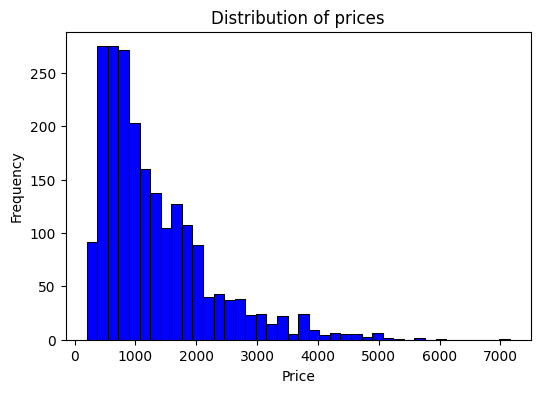

In [218]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [54]:
# dealing with outliers
data=[1,10,100,1000]
datalog=np.log(data)

In [55]:
# using np.log1p add one unit to every number in list and compute natural log
np.log1p(data)

array([0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [56]:
# find exponent number which were produced by np.log1p
np.expm1(np.log1p(data))

array([   1.,   10.,  100., 1000.])

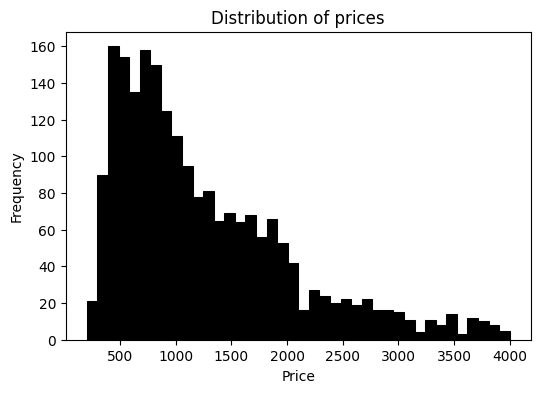

In [57]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price[df.final_price < 4000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

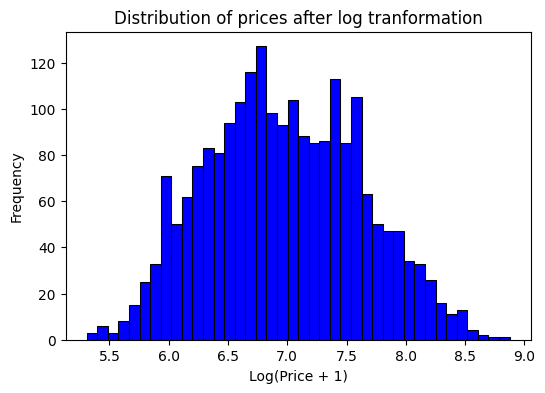

In [58]:
log_price = np.log1p(df.final_price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()  # this looks much better

In [59]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 1


In [60]:
### There's one column with missing values. What is it?
# screen


In [61]:
# screen

### Question 2

In [62]:

# What's the median (50% percentile) for variable 'ram'?

In [63]:
df.ram.median()  # 15.41

np.float64(16.0)

### Validation framework

In [196]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [197]:
n_train, n_val, n_test, n

(1296, 432, 432, 2160)

In [198]:
# if we want to logarith prices
# y_train_orig = df_train.final_price.values
# y_val_orig = df_val.final_price.values
# y_test_orig = df_test.final_price.values

# y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
# y_test = np.log1p(df_test.final_price.values)

# del df_train['final_price']
# del df_val['final_price']
# del df_test['final_price']

In [199]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Linear Regression

In [200]:
# I need to review this

In [201]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline solution

In [202]:
base = ['ram',
'storage',
'screen',
]

In [203]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [204]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [205]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [206]:
np.isnan(X_train).sum()

np.int64(0)

In [207]:
w_0,w

(np.float64(676.8954853003862),
 array([ 43.70681555,   0.86506867, -36.10399833]))

##### **RMSA**

In [208]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### baseline rmse

In [209]:
y_mean=[y_train.mean()]* len(y_train)


In [210]:
round(rmse(y_mean, y_pred),2)


np.float64(718.21)

In [211]:
round(rmse(y_train, y_pred))

602

In [212]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [213]:
round(rmse(y_val, y_pred),2)

np.float64(597.36)

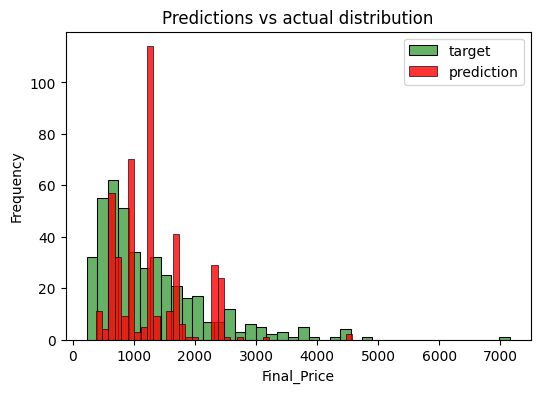

In [214]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Final_Price')
plt.title('Predictions vs actual distribution')

plt.show()

#### prediction by filling in with mean

In [100]:
train_mean=X_train[:,2].mean()
train_mean

np.float64(15.163453164294694)

In [101]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(train_mean)
    X = df_num.values
    return X

In [102]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [103]:
w_0,w

(np.float64(808.9164634026029),
 array([ 43.90774624,   0.87135241, -45.18276712]))

In [110]:
y_pred = w_0 + X_train.dot(w)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

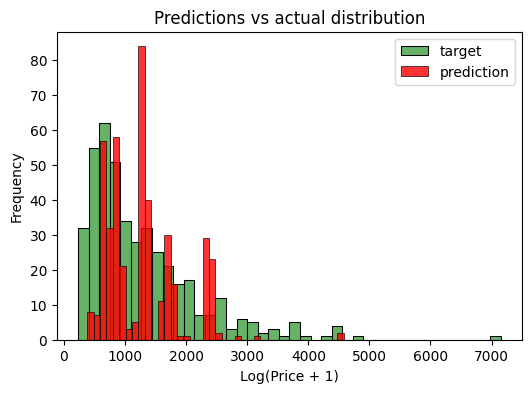

In [111]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [113]:
round(rmse(y_val, y_pred),2)


np.float64(600.27)

In [108]:
round(rmse(y_val, y_pred),2)

np.float64(600.27)

### Question 3

In [175]:
# Filling NAs

In [176]:
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?  it is the same when we use validataion data

### Question 4

In [177]:

# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?

In [114]:
base.copy()

['ram', 'storage', 'screen']

In [137]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [116]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.002)

In [117]:
y_pred = w_0 + X_train.dot(w)

In [118]:
round(rmse(y_train, y_pred),2)

np.float64(602.18)

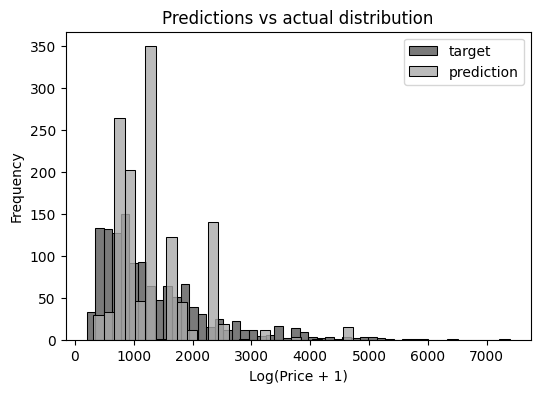

In [119]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [120]:

y_pred = w_0 + X_val.dot(w)

In [121]:
round(rmse(y_val, y_pred),2)

np.float64(600.26)

In [138]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rm=round(rmse(y_val, y_pred),2)
    print((r,rm))


    
    
    

(0, np.float64(597.36))
(0.01, np.float64(597.36))
(0.1, np.float64(597.35))
(1, np.float64(597.21))
(5, np.float64(597.01))
(10, np.float64(597.06))
(100, np.float64(597.9))


### Question 5

In [122]:

# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [139]:
scores=[]
for v in range(10):
    np.random.seed(v)
    
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values
    

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

      
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rm=round(rmse(y_val, y_pred),2)
    print(v,rm)
    scores.append(rm)
    
    
    

0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1


In [320]:
scores

[np.float64(565.45),
 np.float64(636.8),
 np.float64(588.96),
 np.float64(597.81),
 np.float64(571.96),
 np.float64(573.24),
 np.float64(647.34),
 np.float64(550.44),
 np.float64(587.33),
 np.float64(576.1)]

In [140]:
round(np.std(scores),3)

np.float64(29.176)

In [148]:
np.random.seed(9)
    
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()



y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
rm=round(rmse(y_test, y_pred),2)
print(rm)

614.11


In [149]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)

608.6099822049573


In [150]:
np.expm1(0.46)

np.float64(0.5840739849944818)

In [151]:
g=np.log1p(20)
g

np.float64(3.044522437723423)

In [152]:
np.expm1(g)

np.float64(20.0)

In [153]:
np.std(y_pred)

np.float64(705.4714169056714)

In [235]:
np.std(np.expm1(y_pred))

np.float64(1005.7342094090634)